In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mpl_toolkits.mplot3d.axes3d as Axes3D
import os

In [85]:
filename = 'Notas_vs_HorasEstudiadas.csv' # Nombre del archivo a leer

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Dataset_Drive/LAB1_horas_vs_notas.csv', delimiter=',',skiprows=1)# Cargar los datos del archivo en un array de numpy (skiprows=1 para saltar la primera fila que contiene los nombres de las columnas)
X, y = data[:, 0], data[:, 1] # Separar las columnas en X y y es decir las horas estudiadas y las notas respectivamente

m = y.size  # Número de ejemplos de entrenamiento

In [88]:
X # Imprimir las horas estudiadas

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8, 4.2,
       9.5, 5.8, 2.3, 4.7, 1.6, 9. , 6.2, 8.1, 3.9, 2.2, 7.1, 6.3, 5.3,
       4.4, 1.8, 9.4, 6.7, 3.7, 7.3, 4.1, 8. , 3.1, 1.3, 5.7, 2.8, 7.9,
       6.6, 3.6, 2.4, 4.6, 8.4, 1.7, 5.2, 6.4, 7.6, 9.3, 3.4, 2.1, 5.4,
       8.2, 1.4, 9.6, 6.8, 7.5, 4.3, 6.5, 8.7, 3. , 2.9, 1.2, 9.7, 4.9,
       5.6, 8.6, 2.6, 7.2, 1. , 6. , 4. , 5. , 6.8, 2. , 3. , 7. , 9.8,
       5.8, 4.4, 6.1, 3.7, 8. ])

In [89]:
print(y) # Imprimir las notas

[21. 47. 27. 75. 30. 20. 88. 60. 81. 25. 85. 62. 41. 42. 17. 95. 30. 24.
 67. 69. 30. 54. 35. 76. 86. 49. 90. 63. 23. 50. 19. 92. 68. 82. 38. 22.
 73. 66. 56. 45. 21. 93. 71. 37. 77. 44. 79. 28. 16. 59. 29. 80. 72. 36.
 26. 48. 84. 18. 53. 64. 78. 94. 33. 20. 55. 83. 15. 98. 74. 70. 43. 65.
 87. 27. 31. 14. 96. 51. 57. 89. 32. 72. 12. 61. 40. 52. 67. 18. 34. 73.
 99. 60. 44. 63. 37. 84.]


In [90]:

print("tamaño de las filas de la columna de horas estudiadas = ", X.size) #tamaño de las filas del dataset para la variable X que son las horas estudiadas
print("tamaño de las filas de la columna de notas = ", y.size) #tamaño de las columnas del dataset para la variable y que son las notas obtenidas


tamaño de las filas de la columna de horas estudiadas =  96
tamaño de las filas de la columna de notas =  96


In [91]:
#TRAZAR LOS DATOS
def plotData(x, y): #Funcion para graficar los puntos x e y (def es para definir una funcion)

    fig = plt.figure()  # abre una nueva figura con el nombre de fig

    plt.plot(x, y, 'ro', ms=10, mec='k') # Grafica los puntos x e y con un circulo rojo, ms es el tamaño del circulo y mec es el color del borde del circulo
    plt.ylabel('notas sacadas (Puntaje 1-100)') # Etiqueta del eje y
    plt.xlabel('Total de horas de estudio') # Etiqueta del eje x

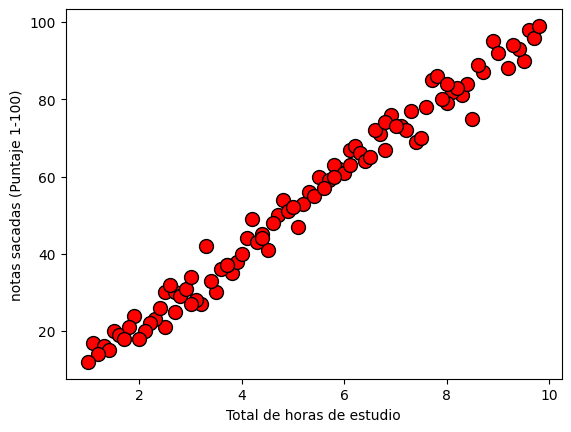

In [92]:
plotData(X, y)

In [93]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).
X = np.stack([np.ones(m), X], axis=1) # Agregar una columna de unos a X para el término independiente theta_0

In [94]:
def computeCost(X, y, theta): #Funcion para calcular el costo de la regresion lineal
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0 # inicializa el costo
    h = np.dot(X, theta) # producto punto de X y theta es la hipotesis h(x) = theta_0 + theta_1 * x
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))  # ecuación de costo
    return J # retorna el costo

In [95]:
# Cálculo del costo con theta = [0, 0]
J = computeCost(X, y,  theta=np.array([0.0, 0.0])) # Llamar a la funcion computeCost y le pasamos los datos de X, y y theta = [0, 0] (thetha 0 por que es el valor inicial)
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J) # Imprimir el costo calculado  respecto a theta = [0, 0] es decir theta_0 = 0 y theta_1 = 0
print('Valor de costo esperado (puede variar según los datos)\n') # Imprimir el valor esperado del costo

# Pruebas adicionales de la función de costos
J = computeCost(X, y, theta=np.array([-1, 2])) # Llamar a la funcion computeCost y le pasamos los datos de X, y y theta = [-1, 2] (thetha -1 por que es el valor inicial y theta 2 por que es el valor inicial)
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J) # Imprimir el costo calculado  respecto a theta = [-1, 2] es decir theta_0 = -1 y theta_1 = 2
print('Valor de costo esperado (puede variar según los datos)\n') # Imprimir el valor esperado del costo


Con theta = [0, 0] 
 Costo calculado = 1768.80
Valor de costo esperado (puede variar según los datos)

Con theta = [-1, 2]
 Costo calculado = 1188.78
Valor de costo esperado (puede variar según los datos)



In [96]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) # ecuación de actualización de theta
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [97]:
# inicializa los parametros de ajuste
theta = np.zeros(2)  # theta tiene dos parámetros: theta_0 (intercepto) y theta_1 (pendiente)

# configuraciones para el descenso por el gradiente
iterations = 50  # Puedes ajustar este valor si es necesario
alpha = 0.003  # Ajusta la tasa de aprendizaje si el costo no converge adecuadamente

# Ejecuta el descenso por gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Imprime los valores de theta obtenidos
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))

# Eliminado esta línea, ya que los valores esperados no son relevantes para tu dataset
# print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')


Theta encontrada por descenso gradiente: 1.5540, 9.9083


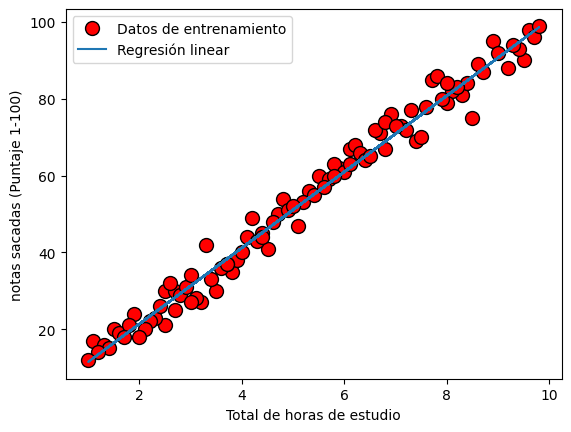

In [98]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Datos de entrenamiento', 'Regresión linear'])

In [99]:
# Supongamos que quieres predecir la nota para 3.5 y 9 horas de estudio
# Predicción de notas para 3.5 horas de estudio
predict1 = np.dot([1, 3.5], theta)
print('Para 3.5 horas de estudio, se predice una nota de {:.2f}'.format(predict1)) # Imprimir la predicción de la nota para 3.5 horas de estudio

# Predicción de notas para 9 horas de estudio
predict2 = np.dot([1, 9], theta) # dot es para multiplicar los valores de la matriz X y theta para obtener la predicción ejemplo  [1, 9] * [theta_0, theta_1] en si seria 1*theta_0 + 9*theta_1
print('Para 9 horas de estudio, se predice una nota de {:.2f}'.format(predict2)) # Imprimir la predicción de la nota para 9 horas de estudio el 2f es para redondear a 2 decimales


Para 3.5 horas de estudio, se predice una nota de 36.23
Para 9 horas de estudio, se predice una nota de 90.73


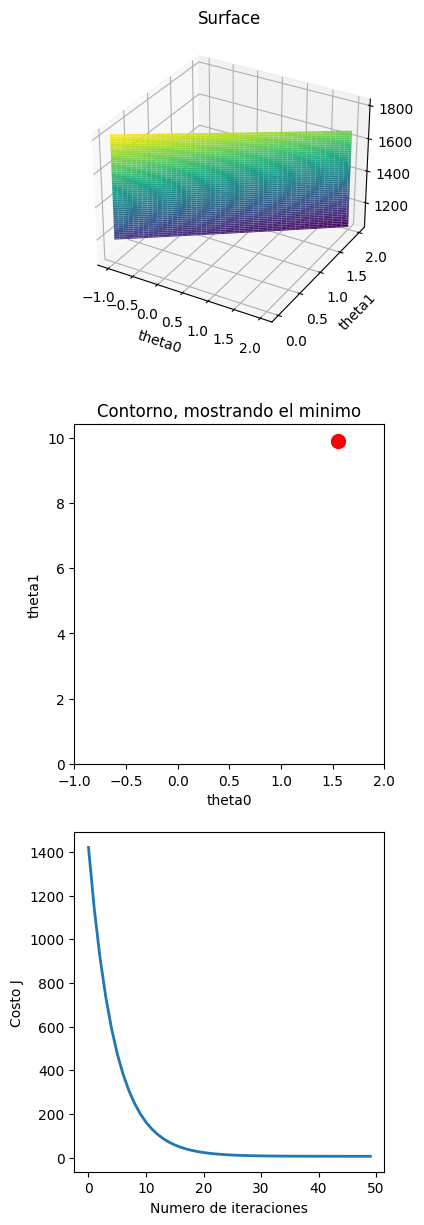

In [100]:
# Definir cuadrícula sobre la que se calcula J (ajustado para tu dataset)
theta0_vals = np.linspace(-1, 2, 100)  # Ajustado según el rango esperado del intercepto
theta1_vals = np.linspace(0, 2, 100)   # Ajustado según el rango esperado de la pendiente

# Inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# Graficar la superficie
fig = plt.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# Graficar contornos
# Grafica J_vals como 20 contornos espaciados logaritmicamente entre 0.01 y 1000
ax = plt.subplot(312)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contorno, mostrando el minimo')

# Graficar la convergencia del costo
ax = plt.subplot(313)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

pass


In [101]:
from sklearn.metrics import r2_score

# Supongamos que y es el vector de valores reales y y_pred es el vector de predicciones del modelo
# y_pred = np.dot(X, theta)  # Predicciones del modelo

# Calcular el R^2
r2 = r2_score(y, np.dot(X, theta))
print('El coeficiente de determinación R^2 es {:.2f}'.format(r2))

El coeficiente de determinación R^2 es 0.98
